# Example of plot loss vs window size

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

In [2]:
# Example time series data
data = np.sin(np.linspace(0, 100, 1000))  # Replace with your data
print(data)

[ 0.00000000e+00  9.99330162e-02  1.98865536e-01  2.95807081e-01
  3.89787104e-01  4.79864709e-01  5.65138069e-01  6.44753455e-01
  7.17913784e-01  7.83886601e-01  8.42011406e-01  8.91706275e-01
  9.32473678e-01  9.63905466e-01  9.85686954e-01  9.97600074e-01
  9.99525555e-01  9.91444120e-01  9.73436677e-01  9.45683512e-01
  9.08462478e-01  8.62146222e-01  8.07198446e-01  7.44169268e-01
  6.73689717e-01  5.96465408e-01  5.13269488e-01  4.24934884e-01
  3.32345974e-01  2.36429728e-01  1.38146426e-01  3.84800478e-02
 -6.15715795e-02 -1.61006773e-01 -2.58830020e-01 -3.54061947e-01
 -4.45749125e-01 -5.32973611e-01 -6.14862143e-01 -6.90594881e-01
 -7.59413613e-01 -8.20629350e-01 -8.73629220e-01 -9.17882606e-01
 -9.52946458e-01 -9.78469728e-01 -9.94196886e-01 -9.99970476e-01
 -9.95732696e-01 -9.81525973e-01 -9.57492539e-01 -9.23873010e-01
 -8.81003973e-01 -8.29314618e-01 -7.69322443e-01 -7.01628067e-01
 -6.26909226e-01 -5.45913979e-01 -4.59453224e-01 -3.68392576e-01
 -2.73643705e-01 -1.76155

In [3]:
# Function to create sequences
def create_sequences(data, window_size):
    sequences = []
    targets = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i + window_size])
        targets.append(data[i + window_size])
    return np.array(sequences), np.array(targets)

# Different window sizes
window_sizes = [5, 10, 20, 50, 100]
losses = {}

# Training configuration
epochs = 20
batch_size = 32
learning_rate = 0.001

In [4]:
for window_size in window_sizes:
    X, y = create_sequences(data, window_size)
    X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for LSTM input
    
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    losses[window_size] = history.history['loss']



c:\Users\N.J.M\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


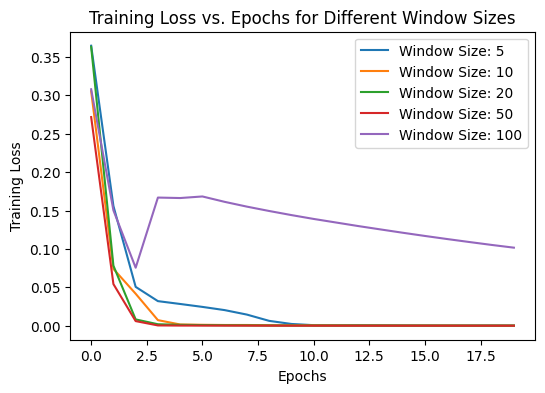

In [5]:
# Plotting the training loss for different window sizes
plt.figure(figsize=(6, 4))
for window_size, loss in losses.items():
    plt.plot(loss, label=f'Window Size: {window_size}')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epochs for Different Window Sizes')
plt.legend()
plt.show()